In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pickle

In [3]:
X_train = pd.read_pickle('../pickled_models/X_train.pkl')
X_test = pd.read_pickle('../pickled_models/X_test.pkl')
y_train = pd.read_pickle('../pickled_models/y_train.pkl')
y_test = pd.read_pickle('../pickled_models/y_test.pkl')

### Baseline CVEC Vectorizer

In [9]:
cvec0 = pickle.load(open('../pickled_models/cvec0_baseline','rb'))
X_train_c = cvec0.fit_transform(X_train)
X_test_c = cvec0.transform(X_test)

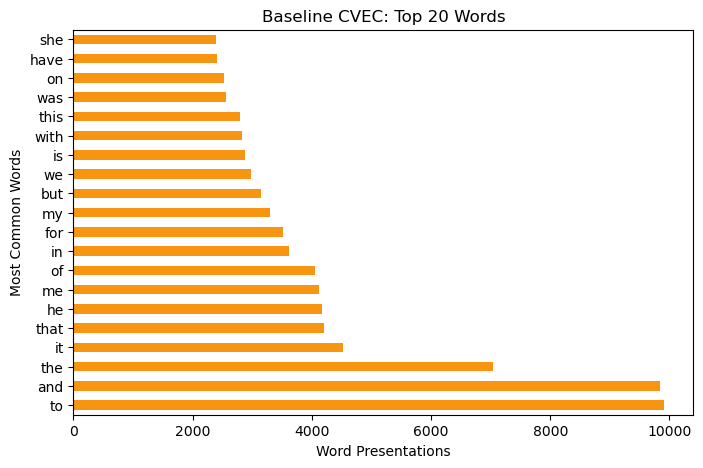

In [8]:
plt.figure(figsize = (8,5))
pd.DataFrame(X_train_c.todense(), columns = cvec0.get_feature_names_out()).sum().sort_values(ascending = False)[:20].plot(kind = 'barh', color = '#f79411')
plt.title('Baseline CVEC: Top 20 Words')
plt.xlabel('Word Presentations')
plt.ylabel('Most Common Words');

### Baseline Tfidf Vectorizer

In [13]:
tvec0 = pickle.load(open('../pickled_models/tvec0_baseline', 'rb'))
X_train_t = tvec0.fit_transform(X_train)

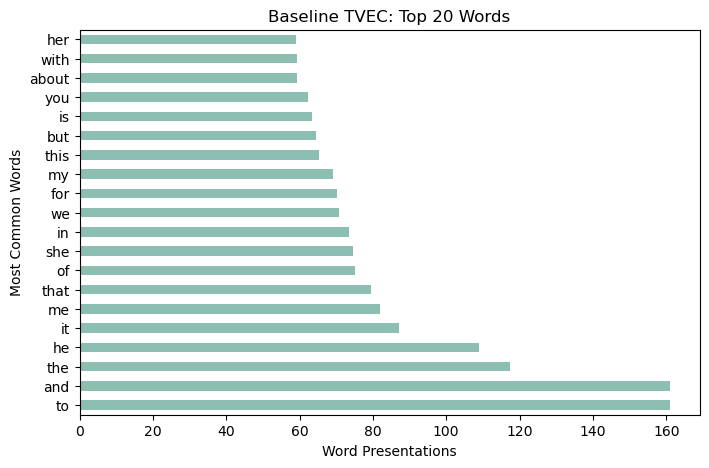

In [14]:
plt.figure(figsize = (8,5))
pd.DataFrame(X_train_t.todense(), columns = tvec0.get_feature_names_out()).sum().sort_values(ascending = False)[:20].plot(kind = 'barh', color = '#8cbeb2')
plt.title('Baseline TVEC: Top 20 Words')
plt.xlabel('Word Presentations')
plt.ylabel('Most Common Words');

##### Test: Standard Scale to get the frames on the same visual?

In [15]:
scaler = StandardScaler()

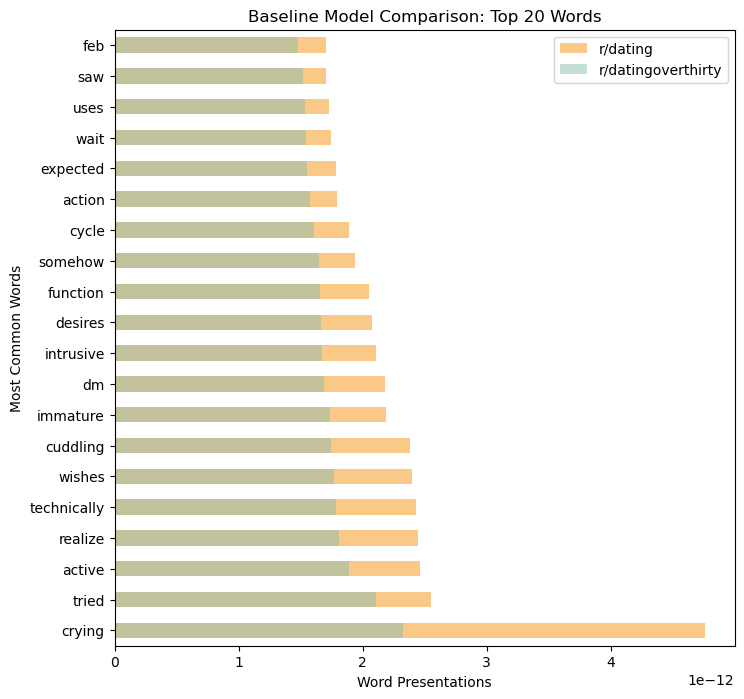

In [19]:
plt.figure(figsize = (8,8))
cvec_df = pd.DataFrame(X_train_t.todense(), columns = tvec0.get_feature_names_out())
tvec_df = pd.DataFrame(X_train_c.todense(), columns = cvec0.get_feature_names_out())

cvec_df_sc = pd.DataFrame(scaler.fit_transform(cvec_df), columns = cvec0.get_feature_names_out())
tvec_df_sc = pd.DataFrame(scaler.fit_transform(tvec_df), columns = tvec0.get_feature_names_out())

cvec_df_sc.sum().sort_values(ascending = False)[:20].plot(kind = 'barh', color = '#f79411', alpha = 0.5, label = 'r/dating')
tvec_df_sc.sum().sort_values(ascending = False)[:20].plot(kind = 'barh', color = '#8cbeb2', alpha = 0.5, label = 'r/datingoverthirty')


plt.title('Baseline Model Comparison: Top 20 Words')
plt.xlabel('Word Presentations')
plt.ylabel('Most Common Words')
plt.legend();